# Lab 3: Gesture Recognition using Convolutional Neural Networks

In this lab you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Load and split data for training, validation and testing
2. Train a Convolutional Neural Network
3. Apply transfer learning to improve your model

Note that for this lab we will not be providing you with any starter code. You should be able to take the code used in previous labs, tutorials and lectures and modify it accordingly to complete the tasks outlined below.

### What to submit

Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to **File > Print** and then save as PDF. The Colab instructions
has more information. Make sure to review the PDF submission to ensure that your answers are easy to read. Make sure that your text is not cut off at the margins.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission.

## Colab Link

Include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/1_H7CbYzNgWvxvtW0UYiO6oMUQwGkCTsX?usp=sharing


## Dataset

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing. The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)

## Part B. Building a CNN [50 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early.

### 1. Data Loading and Splitting [5 pt]

Download the anonymized data provided on Quercus. To allow you to get a heads start on this project we will provide you with sample data from previous years. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread as in Lab 1, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/docs/stable/torchvision/datasets.html?highlight=image%20folder#torchvision.datasets.ImageFolder
)

# Answers:
The process began by **uploading a zip file to Google Drive**, followed by its extraction. To prevent overlap between the test and training sets, three functions were implemented to filter the images based on specific criteria.

The first function, **train_valid_file**, ensured that hands seen in the training set were not included in the test set. The second function, **val_valid_file**, determined whether an image belonged to the validation set based on its presence in the designated indices. Lastly, the **test_valid_file** function identified images that should be included in the test set.

The objective was to achieve a distribution close to **80% for the training set and 10% for both the validation and test sets.** After executing the code, the final results were as follows: the training set contained **1701 images**, accounting for approximately **77.21%** of the total dataset. The validation set consisted of **279 images**, representing approximately **12.66%** of the dataset. Finally, the test set comprised **223 images**, making up around **10.12%** of the dataset.


This splitting strategy ensured that the test set remained independent of the training set by excluding hands seen during training. Furthermore, it successfully achieved the desired distribution of the three sets, with **the training set being the largest, followed by the validation and test sets.**

In [1]:
#import the libraries
import time
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader


import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import random
import shutil
from torchvision.datasets import ImageFolder


In [2]:
# mount our Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#unzip the anonymized data in google drive
!unzip '/content/drive/MyDrive/Colab Notebooks/Lab3 Datasets.zip' -d '/root/datasets'

Archive:  /content/drive/MyDrive/Colab Notebooks/Lab3 Datasets.zip
   creating: /root/datasets/Lab3_Gestures_Summer/
   creating: /root/datasets/Lab3_Gestures_Summer/I/
  inflating: /root/datasets/Lab3_Gestures_Summer/I/1968_I_1.jpg  
  inflating: /root/datasets/Lab3_Gestures_Summer/I/1510_I_2.jpg  
  inflating: /root/datasets/Lab3_Gestures_Summer/I/754_I_2.jpg  
  inflating: /root/datasets/Lab3_Gestures_Summer/I/1294_I_2.jpg  
  inflating: /root/datasets/Lab3_Gestures_Summer/I/1106_I_3.jpg  
  inflating: /root/datasets/Lab3_Gestures_Summer/I/2238_I_1.jpg  
  inflating: /root/datasets/Lab3_Gestures_Summer/I/538_I_2.jpg  
  inflating: /root/datasets/Lab3_Gestures_Summer/I/1509_I_1.jpg  
  inflating: /root/datasets/Lab3_Gestures_Summer/I/1457_I_3.jpg  
  inflating: /root/datasets/Lab3_Gestures_Summer/I/1051_I_2.jpg  
  inflating: /root/datasets/Lab3_Gestures_Summer/I/565_I_2.jpg  
  inflating: /root/datasets/Lab3_Gestures_Summer/I/2265_I_1.jpg  
  inflating: /root/datasets/Lab3_Gestures_

In [4]:
#change currect place to another directory
%cd  /root/datasets/Lab3_Gestures_Summer

/root/datasets/Lab3_Gestures_Summer


In [5]:
# See what is inside the directory
!ls

#----> now we know that there are 9 classes!!!!!!!!!!!!!!!!!!!

A  B  C  D  E  F  G  H	I


In [29]:
# chooose random seed
np.random.seed(1234)

# We transform them to Tensors of normalized range [-1, 1].
# subtracting the mean (0.5) and dividing by the standard deviation (0.5),
transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

indices = list(range(200, 2000))

# Try to make both test set and valid set to 10%-20%
# replace = False means that same index won't be choose twice
test_indices = np.random.choice(indices, 150, replace=False)
val_indices = np.random.choice(list(set(indices) - set(test_indices)), 200, replace=False)


def train_valid_file(filename):
    # Exclude hands in both test and validation indices
    train_file = not any(person in filename for person in test_indices.astype(str)) and \
    not any(person in filename for person in val_indices.astype(str))
    return train_file

def val_valid_file(filename):
    # Exclude hands in test indices
    val_file = any(person in filename for person in val_indices.astype(str)) and \
    not any(person in filename for person in test_indices.astype(str))
    return val_file

def test_valid_file(filename):
    #***************************
    #contain hands that are never seen in training!
    #***************************
    test_file = any(person in filename for person in test_indices.astype(str)) and \
    not any(person in filename for person in val_indices.astype(str))
    return test_file


train_data = torchvision.datasets.ImageFolder('/root/datasets/Lab3_Gestures_Summer',
                                              loader=plt.imread,
                                              is_valid_file=train_valid_file,
                                              transform=transform)
val_data = torchvision.datasets.ImageFolder('/root/datasets/Lab3_Gestures_Summer',
                                            loader=plt.imread,
                                            is_valid_file=val_valid_file,
                                            transform=transform)
test_data = torchvision.datasets.ImageFolder('/root/datasets/Lab3_Gestures_Summer', loader=plt.imread,
                                             is_valid_file=test_valid_file,
                                             transform=transform)

#total data numbers and percentages
print("Total data: ",len(train_data) + len(val_data) + len(test_data))
total_data = len(train_data) + len(val_data) + len(test_data)

print("Training images #: ", len(train_data), ", which is", len(train_data)/total_data*100, "% of the dataset.")
print("Validation images #: ", len(val_data), ", which is", len(val_data)/total_data*100, "% of the dataset.")
print("Test images #: ", len(test_data), ", which is", len(test_data)/total_data*100, "% of the dataset.")

Total data:  2203
Training images #:  1701 , which is 77.21289151157512 % of the dataset.
Validation images #:  279 , which is 12.664548343168407 % of the dataset.
Test images #:  223 , which is 10.122560145256468 % of the dataset.



Train Set: 



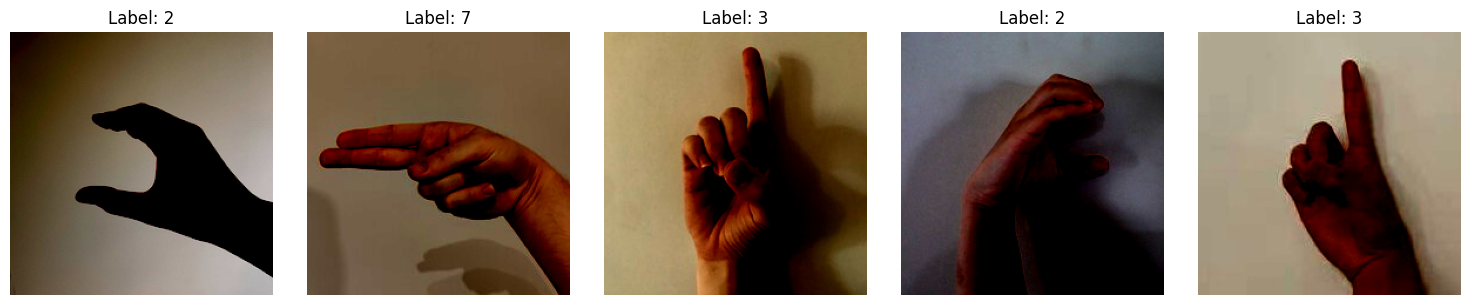


Val Set:



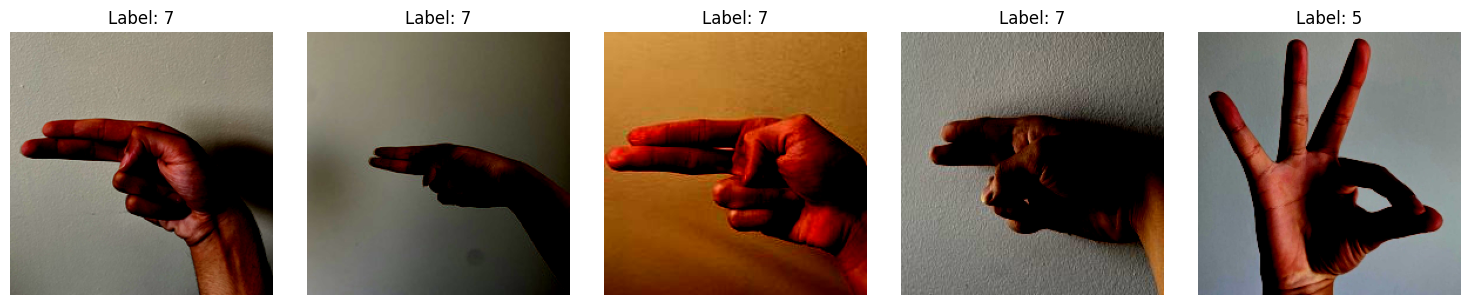

In [7]:
#display the first few images

# Create the train, val data, and test data loaders
train_loader = DataLoader(train_data, batch_size=1, shuffle=True)
val_loader = DataLoader(val_data, batch_size=1, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1, shuffle=True)

#display the first few images in the training set
print()
print("Train Set: ")
print()
# Create subplots with 1 row and 5 columns
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, (image, label) in enumerate(train_loader):
    if i < 5:  # Display only the first 5 images
        ax = axes[i]  # Select the current subplot
        ax.imshow(image.squeeze().permute(1, 2, 0))
        ax.set_title(f"Label: {label.item()}")
        ax.axis("off")
    else:
        break

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

# Display the first few images in the val set
print()
print("Val Set:")
print()
# Create subplots with 1 row and 5 columns
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, (image, label) in enumerate(val_loader):
    if i < 5:  # Display only the first 5 images
        ax = axes[i]  # Select the current subplot
        ax.imshow(image.squeeze().permute(1, 2, 0))
        ax.set_title(f"Label: {label.item()}")
        ax.axis("off")
    else:
        break
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


### 2. Model Building and Sanity Checking [15 pt]

### Part (a) Convolutional Network - 5 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

# Answers:

The "CNN_Classifier" neural network architecture is specifically designed for **image classification** tasks. It comprises two main components: **convolutional layers and fully connected layers**. The **two** **convolutional layers**, including **"conv1" and "conv2,"** extract meaningful features from the input images, while **max pooling layers reduce spatial dimensions** to capture the most important information. The flattened feature maps are then fed into **two** **fully connected layers**, **"fc1" and "fc2,"** which integrate high-level features for classification. The **ReLU activation function** is applied throughout the network to introduce non-linearity and enhance learning. Overall, this architecture effectively combines convolutional and fully connected layers with appropriate pooling and activation functions to enable accurate image classification.

In the "CNN_Classifier" architecture, the input images have 3 channels (representing the RGB color channels). The first convolutional layer (**"conv1"**) takes these **3-channel inputs** and produces 16 output channels. The subsequent convolutional layer ("**conv2**") takes the **16-channel feature maps** and further transforms them into **32 output channels**. In the fully connected layers, the **first layer ("fc1") has 128 hidden units**, which indicates the number of neurons in that layer, and the **final layer ("fc2") has 9 units** corresponding to the **number of classes for classification.**

In [8]:
# See what is inside the directory
!ls

#----> now we know that there are 9 classes!!!!!!!!!!!!!!!!!!!

A  B  C  D  E  F  G  H	I


In [9]:
class CNN_Classifier(nn.Module):
    def __init__(self):
        super(CNN_Classifier, self).__init__()
        self.name = "cnn"

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)

        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(32 * 56 * 56, 128)
        self.fc2 = nn.Linear(128, 9)

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


### Part (b) Training Code - 5 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

# Answers:
The training code provided demonstrates a systematic approach to train a neural network model for multi-class classification. It begins by defining two helper functions, namely **"get_model_name" and "get_accuracy,"** which assist in organizing and evaluating the training process. The main training function employs d**efault hyperparameters such as a batch size of 64, 10 epochs, a learning rate of 0.001, and a weight decay factor of 0.** However, users have the **flexibility to input their own hyperparameters** according to their specific needs. The choice of the **cross-entropy error function** and the Stochastic Gradient Descent **(SGD)** **optimizer** is motivated by their effectiveness in handling multi-class classification tasks. The **torch.save()** function is then utilized to save the model's state dictionary, which includes all the learnable parameters, to the specified file **model_path.**  The code also imports the "**timing**" module to record the time taken for training and takes advantage of **GPU acceleration** in the Colab environment for faster computations. Additionally, the code computes both training and validation accuracies after each epoch, allowing for the evaluation of model performance. Finally, **the training and validation** **accuracies are plotted** against the epochs, providing a visual representation of the model's learning progress.


In [10]:
#helper function get_model_name and get_accuracy
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values
    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path



###############################################################################
def get_accuracy(model, batch_size, train=False):
    if train:
        data = train_data
    else:
        data = val_data

    correct = 0
    total = 0
    model.eval()
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=64):

      #############################################
      # To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        imgs = imgs.cuda()
        labels = labels.cuda()
      #############################################

      output = model(imgs)

      #select index with maximum prediction score
      pred = output.max(1, keepdim=True)[1] # get the index of the max logit
      correct += pred.eq(labels.view_as(pred)).sum().item()
      total += imgs.shape[0]
    return correct / total

In [11]:
#function for training
def train(model, traindata, batch_size=64, num_epochs = 10, learn_rate=0.001, weight_decay=0):
    train_loader = torch.utils.data.DataLoader(traindata,
                                               batch_size=batch_size,
                                               shuffle=True) # shuffle after every epoch
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learn_rate, momentum=0.9, weight_decay=weight_decay)

    iters, losses, train_acc, val_acc = [], [], [], []

    start_time = time.time()
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for images, labels in iter(train_loader):

            #############################################
            # To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              images = images.cuda()
              labels = labels.cuda()
            #############################################

            out = model(images)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch


            # Save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute average loss
            n += 1

        train_acc.append(get_accuracy(model, batch_size=batch_size, train=True)) # compute training accuracy
        val_acc.append(get_accuracy(model, batch_size=batch_size, train=False))  # compute validation accuracy
        print(("Epoch {}: Train acc: {} |"+"Validation acc: {}").format(
                epoch + 1,
                train_acc[-1],
                val_acc[-1]))

        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, learn_rate, epoch)
        torch.save(model.state_dict(), model_path)


    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.4f} seconds".format(elapsed_time))


    # plotting
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")

    plt.subplot(1,2,2)
    plt.title("Training Curve")
    plt.plot(range(1 ,num_epochs+1), train_acc, label="Train")
    plt.plot(range(1 ,num_epochs+1), val_acc, label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))



### Part (c) “Overfit” to a Small Dataset - 5 pt

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

# Answers:
In the end, I achieved **100% training accuracy on the small dataset**, which demonstrates that my model and training code are capable of memorizing the labels of this small dataset.

In [12]:
# the number of samples in the small dataset
num_samples = 64

# total number of images
total_images = len(train_data)

# Create a list of randomly selected indices
selected_indices = random.sample(range(total_images), num_samples)

# Create the small dataset by selecting the images with the selected indices
small_data = [train_data[i] for i in selected_indices]

#help function for small model
def small_get_accuracy(model, batch_size, train = True):
    data = small_data

    correct = 0
    total = 0
    model.eval() #*********#
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=64):

      #############################################
      # To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        imgs = imgs.cuda()
        labels = labels.cuda()
      #############################################

      output = model(imgs)
      pred = output.max(1, keepdim=True)[1] # get the index of the max logit
      correct += pred.eq(labels.view_as(pred)).sum().item()
      total += imgs.shape[0]
    return correct / total

# train set
def small_train(model, data, batch_size=64, num_epochs=1, lr=0.001):
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):

          #############################################
          # To Enable GPU Usage
          if use_cuda and torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
          #############################################

            out = model(imgs)             # forward pass

            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss

            n += 1
        train_acc.append(small_get_accuracy(model, batch_size = batch_size)) # compute training accuracy
        print(("Epoch {}: Train acc: {} ").format(
                epoch + 1,
                train_acc[-1],))

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))



CNN
CNN_Classifier(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=9, bias=True)
  (relu): ReLU()
)
CUDA is available!  Training on GPU ...
Epoch 1: Train acc: 0.109375 
Epoch 2: Train acc: 0.15625 
Epoch 3: Train acc: 0.140625 
Epoch 4: Train acc: 0.140625 
Epoch 5: Train acc: 0.140625 
Epoch 6: Train acc: 0.140625 
Epoch 7: Train acc: 0.140625 
Epoch 8: Train acc: 0.140625 
Epoch 9: Train acc: 0.140625 
Epoch 10: Train acc: 0.140625 
Epoch 11: Train acc: 0.15625 
Epoch 12: Train acc: 0.15625 
Epoch 13: Train acc: 0.171875 
Epoch 14: Train acc: 0.203125 
Epoch 15: Train acc: 0.21875 
Epoch 16: Train acc: 0.28125 
Epoch 17: Train acc: 0.28125 
Epoch 18: Train acc: 0.25 
Epoch 19: Train acc

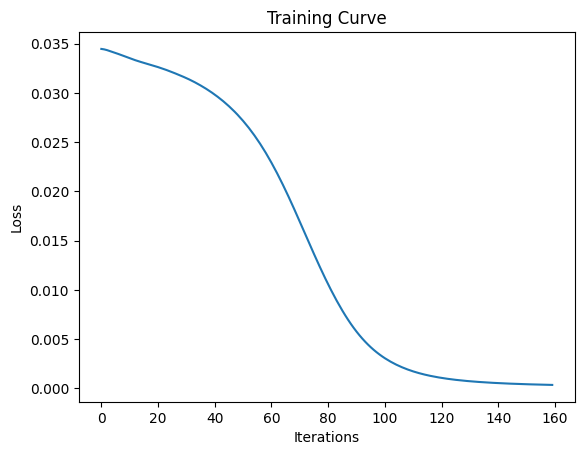

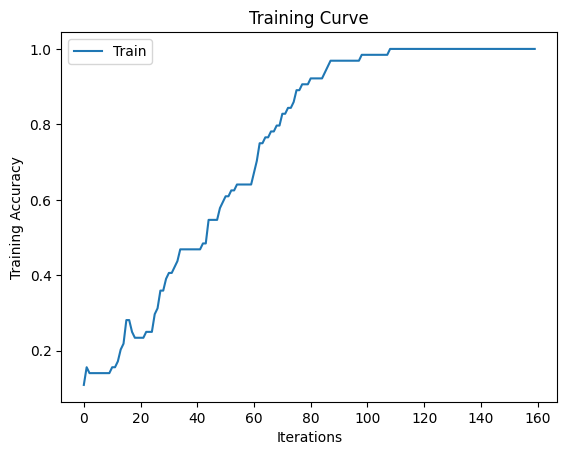

Final Training Accuracy: 1.0


In [ ]:

use_cuda = True
print("CNN")
smallmodel = CNN_Classifier()
smallmodel.name = "my_small_model"
print(smallmodel)

if use_cuda and torch.cuda.is_available():
  smallmodel.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

small_train(smallmodel, small_data, num_epochs=160, lr=0.001, batch_size=64)


### 3. Hyperparameter Search [10 pt]

### Part (a) - 1 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

# Answers:
- number of epochs
- learning rate
- number of hidden layers

### Part (b) - 5 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

1st: same architecture, batch_size=128, num_epochs = 60, learn_rate=0.01, weight_decay=0

CNN-1
CNN_Classifier(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=9, bias=True)
  (relu): ReLU()
)
CUDA is available!  Training on GPU ...
Epoch 1: Train acc: 0.21340388007054673 |Validation acc: 0.21505376344086022
Epoch 2: Train acc: 0.5179306290417401 |Validation acc: 0.5627240143369175
Epoch 3: Train acc: 0.5773074661963551 |Validation acc: 0.6093189964157706
Epoch 4: Train acc: 0.678424456202234 |Validation acc: 0.6881720430107527
Epoch 5: Train acc: 0.7166372721928278 |Validation acc: 0.6810035842293907
Epoch 6: Train acc: 0.7724867724867724 |Validation acc: 0.6953405017921147
Epoch 7: Train acc: 0.7736625514403292 |Validation acc: 0.7060931899641577
Epoch 8: Train acc: 0.82010582

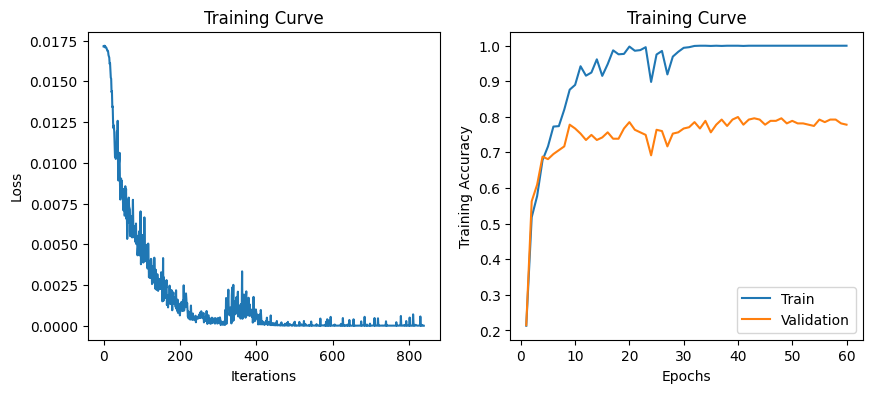

Final Training Accuracy: 0.9994121105232217
Final Validation Accuracy: 0.7777777777777778


In [ ]:
#1st: same architecture, batch_size=128, num_epochs = 60, learn_rate=0.01, weight_decay=0

use_cuda = True
print("CNN-1")
model_1 = CNN_Classifier()
model_1.name = "my_model_1"
print(model_1)

if use_cuda and torch.cuda.is_available():
  model_1.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train(model_1, train_data, batch_size=128, num_epochs = 60, learn_rate=0.01, weight_decay=0)


2nd: same architecture, batch_size=64, num_epochs = 100, learn_rate=0.001, weight_decay=0

CNN-1
CNN_Classifier(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=9, bias=True)
  (relu): ReLU()
)
CUDA is available!  Training on GPU ...
Epoch 1: Train acc: 0.1457965902410347 |Validation acc: 0.16845878136200718
Epoch 2: Train acc: 0.2980599647266314 |Validation acc: 0.34767025089605735
Epoch 3: Train acc: 0.3315696649029982 |Validation acc: 0.4050179211469534
Epoch 4: Train acc: 0.44914756025867136 |Validation acc: 0.45878136200716846
Epoch 5: Train acc: 0.48912404467960025 |Validation acc: 0.48028673835125446
Epoch 6: Train acc: 0.4991181657848324 |Validation acc: 0.5483870967741935
Epoch 7: Train acc: 0.599647266313933 |Validation acc: 0.6021505376344086
Epoch 8: Train acc: 0.5767

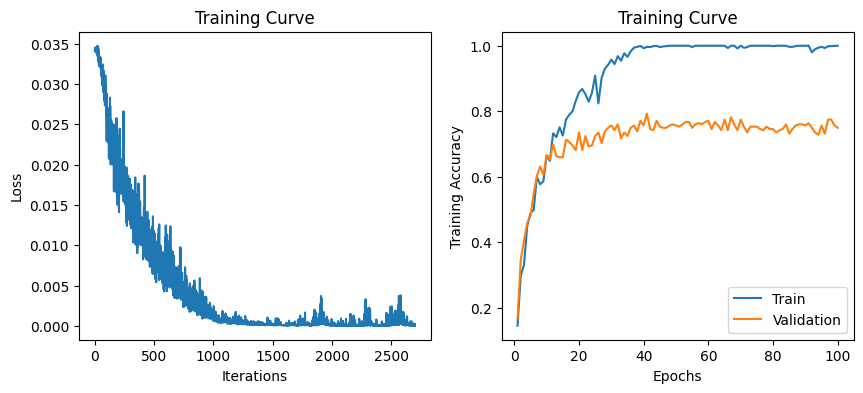

Final Training Accuracy: 0.9994121105232217
Final Validation Accuracy: 0.7491039426523297


In [ ]:
#2nd: same architecture, batch_size=64, num_epochs = 100, learn_rate=0.001, weight_decay=0

use_cuda = True
print("CNN-1")
model_2 = CNN_Classifier()
model_2.name = "my_model_2"
print(model_2)

if use_cuda and torch.cuda.is_available():
  model_2.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train(model_2, train_data, batch_size=64, num_epochs = 100, learn_rate=0.001)


3rd: more complex architecture with additional hidden layers, batch_size=64, num_epochs = 100, learn_rate=0.001, weight_decay=0

CNN-2
CNN_Classifier2(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=9, bias=True)
  (relu): ReLU()
)
CUDA is available!  Training on GPU ...
Epoch 1: Train acc: 0.14168136390358613 |Validation acc: 0.11827956989247312
Epoch 2: Train acc: 0.15873015873015872 |Validation acc: 0.13978494623655913
Epoch 3: Train acc: 0.2657260435038213 |Validation acc: 0.2974910394265233
Epoch 4: Train acc: 0.29747207524985303 |Validation acc: 0.3154121863799283
Epoch 5: Train acc: 0.31393298059964725 |Validation acc: 0.35842293906810035
Epoch 6: Train acc: 0.2774838330393886 |Validation acc: 0.3154121863799283
Epoch 7: Train acc: 0.31569664902998

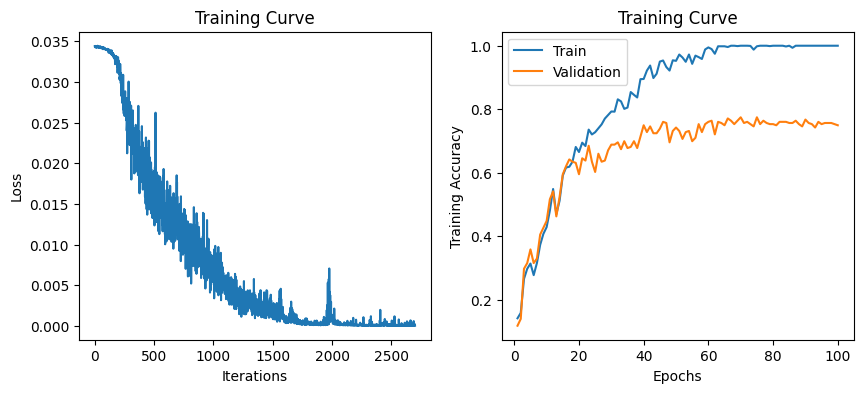

Final Training Accuracy: 0.9994121105232217
Final Validation Accuracy: 0.7491039426523297


In [ ]:
#3rd: more layered architecture, batch_size=64, num_epochs = 100, learn_rate=0.001, weight_decay=0

class CNN_Classifier2(nn.Module):
    def __init__(self):
        super(CNN_Classifier2, self).__init__()
        self.name = "cnn2"

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)

        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(32 * 56 * 56, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 9)

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x



#3rd:

use_cuda = True
print("CNN-2")
model_3 = CNN_Classifier2()
model_3.name = "my_model_3"
print(model_3)

if use_cuda and torch.cuda.is_available():
  model_3.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train(model_3, train_data, batch_size=64, num_epochs = 100, learn_rate=0.001)


4th: more complex architecture with additional hidden layers, actication function from ReLU to LeakyReLU, batch_size=64, num_epochs = 18, learn_rate=0.01, weight_decay=0

CNN-3
CNN_Classifier3(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=9, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
)
CUDA is available!  Training on GPU ...
Epoch 1: Train acc: 0.1781305114638448 |Validation acc: 0.1971326164874552
Epoch 2: Train acc: 0.34156378600823045 |Validation acc: 0.37992831541218636
Epoch 3: Train acc: 0.5173427395649618 |Validation acc: 0.5519713261648745
Epoch 4: Train acc: 0.5778953556731334 |Validation acc: 0.6021505376344086
Epoch 5: Train acc: 0.7048794826572604 |Validation acc: 0.7311827956989247
Epoch 6: Train acc: 0.7854203409758965 |Validation acc: 0.7419354838709677
Epoch 7: Train ac

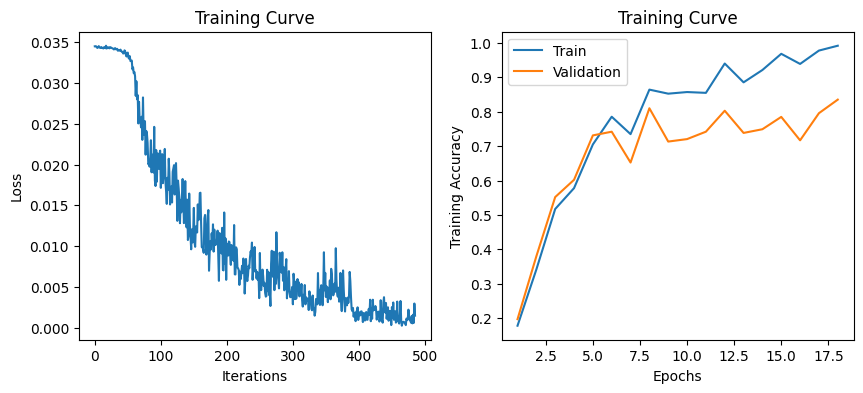

Final Training Accuracy: 0.9917695473251029
Final Validation Accuracy: 0.8351254480286738


In [ ]:
# 4th more layered architecture, actication function from ReLU to LeakyReLU
# batch_size=64, num_epochs = 18, learn_rate=0.01, weight_decay=0

class CNN_Classifier3(nn.Module):
    def __init__(self):
        super(CNN_Classifier3, self).__init__()
        self.name = "cnn3"

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)

        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(32 * 56 * 56, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 9)

        # Activation function
        self.relu = nn.LeakyReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x



use_cuda = True
print("CNN-3")
model_4 = CNN_Classifier3()
model_4.name = "my_model_4"
print(model_4)

if use_cuda and torch.cuda.is_available():
  model_4.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train(model_4, train_data, batch_size=64, num_epochs = 18, learn_rate=0.01)


### Part (c) - 2 pt
Choose the best model out of all the ones that you have trained. Justify your choice.

# Answers:
4th-- more complex architecture with additional hidden layers, actication function from ReLU to LeakyReLU, batch_size=64, num_epochs = 18, learn_rate=0.01, weight_decay=0

Among the models trained, the best performing model is model_4, which utilizes a more complex architecture with additional hidden layers. The activation function is switched from ReLU to LeakyReLU. This model is trained with a batch size of 64, 18 epochs, a learning rate of 0.01, and no weight decay. The choice of model_4 is justified by its **achievement of the highest validation accuracy, reaching 84%**. The additional hidden layers and the activation function change likely contribute to the model's improved performance and ability to capture more intricate patterns in the data.

### Part (d) - 2 pt
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

In [ ]:
#function to get the model_4 accuracy of the testing data
def test_get_accuracy(model, batch_size, train = True):
    data = test_data

    correct = 0
    total = 0
    model.eval() #*********#
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=64):

      #############################################
      # To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        imgs = imgs.cuda()
        labels = labels.cuda()
      #############################################

      output = model(imgs)
      pred = output.max(1, keepdim=True)[1] # get the index of the max logit
      correct += pred.eq(labels.view_as(pred)).sum().item()
      total += imgs.shape[0]
    return correct / total

print("Accuracy of the test set: ", test_get_accuracy(model_4, batch_size = 128)*100, "%")

Accuracy of the test set:  77.57847533632287 %


### 4. Transfer Learning [15 pt]
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part (a) - 5 pt
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:04<00:00, 58.0MB/s]


The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

**Save the computed features**. You will be using these features as input to your neural network in Part
(b), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

In [13]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']



# Load the pre-trained AlexNet model
alexnet = torchvision.models.alexnet(pretrained=True)
alexnet = alexnet.features

# Set the model to evaluation mode
alexnet.eval()

# Define empty lists to store the computed features
train_features = []
val_features = []
test_features = []

%cd /root
# Create directories if they don't exist to save the computed features
save_dir_train = './AlexNet Features/train/'
save_dir_val = './AlexNet Features/val/'
save_dir_test = './AlexNet Features/test/'
os.makedirs(save_dir_train, exist_ok=True)
os.makedirs(save_dir_val, exist_ok=True)
os.makedirs(save_dir_test, exist_ok=True)

# Compute features for the training set
with torch.no_grad():
    n = 0
    for images, labels in train_loader:
        features = alexnet(images)
        train_features.append(features)
        save_path = os.path.join(save_dir_train, classes[labels])
        os.makedirs(save_path, exist_ok=True)
        torch.save(features.squeeze(0), os.path.join(save_path, 'feature_bs1_' + str(n) + '.tensor'))
        n += 1

# Compute features for the validation set
with torch.no_grad():
    n = 0
    for images, labels in val_loader:
        features = alexnet(images)
        val_features.append(features)
        save_path = os.path.join(save_dir_val, classes[labels])
        os.makedirs(save_path, exist_ok=True)
        torch.save(features.squeeze(0), os.path.join(save_path, 'feature_bs1_' + str(n) + '.tensor'))
        n += 1

# Compute features for the test set
with torch.no_grad():
    n = 0
    for images, labels in test_loader:
        features = alexnet(images)
        test_features.append(features)
        save_path = os.path.join(save_dir_test, classes[labels])
        os.makedirs(save_path, exist_ok=True)
        torch.save(features.squeeze(0), os.path.join(save_path, 'feature_bs1_' + str(n) + '.tensor'))
        n += 1


# Concatenate the features into tensors
train_features = torch.cat(train_features)
val_features = torch.cat(val_features)
test_features = torch.cat(test_features)

# Print the shapes of the computed features
# These shapes represent the output of the intermediate layers of the AlexNet model for each image in my dataset
print("Train Features Shape:", train_features.shape)
print("Validation Features Shape:", val_features.shape)
print("Test Features Shape:", test_features.shape)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:00<00:00, 274MB/s]


/root
Train Features Shape: torch.Size([1701, 256, 6, 6])
Validation Features Shape: torch.Size([279, 256, 6, 6])
Test Features Shape: torch.Size([223, 256, 6, 6])


In [14]:
#the results have been saved into directories in the code demonstrated above
#Demonstrating the saved features in the directory.
%cd /root/AlexNet Features
%ls

/root/AlexNet Features
test/  train/  val/


In [15]:
#Demonstrating the 9 classes in the train directory
%cd /root/AlexNet Features/train
%ls

/root/AlexNet Features/train
A/  B/  C/  D/  E/  F/  G/  H/  I/


### Part (b) - 3 pt
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

# Answers:

The **"transfer_CNN"** architecture is a modified version of the AlexNet model that incorporates transfer learning. The initial layers of the network are derived from the pre-trained AlexNet model, referred to as "alexnet.features(img)." The **additional layers are specifically designed** for the classification task at hand. The architecture consists of convolutional layers, fully connected layers, and a LeakyReLU activation function.

In terms of layers, there are **two convolutional layers, namely "conv1" and "conv2,"** which extract hierarchical features from the input. **Max pooling layers** are used to reduce spatial dimensions and capture important information. The **fully connected layers include "fc1," "fc2," and "fc3,"** which integrate high-level features for classification. The number of hidden units varies across these layers, with the last fully connected layer having **9 units** to match the number of classes in the classification task.

The **LeakyReLU activation function** is chosen to introduce non-linearity and enhance the network's learning capabilities. This choice helps address the vanishing gradient problem and improves the model's ability to capture complex patterns in the data.

The initial convolutional layer, **"conv1," takes input from 256 channels** obtained from the pre-trained AlexNet model. It outputs feature maps with **32 channels**. The subsequent convolutional layer, "conv2," further processes the feature maps and produces output with **64 channels.** The fully connected layers consist of hidden units that contribute to the integration and transformation of the extracted features. The first fully connected layer, **"fc1,"** has **64 x 28 x 28 hidden units**, which corresponds to the flattened feature maps after the pooling layers. The following fully connected layers, **"fc2" and "fc3," have 512 and 256 hidden units**, respectively, representing progressively higher-level abstractions of the input data.



In [16]:
# features = ... load precomputed alexnet.features(img) ...
class transfer_CNN(nn.Module):
    def __init__(self):
        super(transfer_CNN, self).__init__()
        self.name = "transfer_cnn"

        # Convolutional layers
        self.conv1 = nn.Conv2d(256, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)

        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 9)

        # Activation function
        self.relu = nn.LeakyReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = F.interpolate(x, size=(28, 28), mode='bilinear', align_corners=False)
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x



### Part (c) - 5 pt
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

In [28]:
train_alexnet = torchvision.datasets.DatasetFolder('/root/AlexNet Features/train',
                                                   loader=torch.load,
                                                   extensions=('.tensor'))
val_alexnet = torchvision.datasets.DatasetFolder('/root/AlexNet Features/val',
                                                 loader=torch.load,
                                                 extensions=('.tensor'))
test_alexnet = torchvision.datasets.DatasetFolder('/root/AlexNet Features/test',
                                                  loader=torch.load,
                                                  extensions=('.tensor'))

In [18]:
#modify get_accuracy to transfer_get_accuracy for alexnet set
def transfer_get_accuracy(model, batch_size, train=False):
    if train:
        data = train_alexnet
    else:
        data = val_alexnet

    correct = 0
    total = 0
    model.eval()
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=64):

      #############################################
      # To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        imgs = imgs.cuda()
        labels = labels.cuda()
      #############################################

      output = model(imgs)

      #select index with maximum prediction score
      pred = output.max(1, keepdim=True)[1] # get the index of the max logit
      correct += pred.eq(labels.view_as(pred)).sum().item()
      total += imgs.shape[0]
    return correct / total

def test_transfer_get_accuracy(model, batch_size, train=False):
    data = test_alexnet

    correct = 0
    total = 0
    model.eval()
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=64):

      #############################################
      # To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        imgs = imgs.cuda()
        labels = labels.cuda()
      #############################################

      output = model(imgs)

      #select index with maximum prediction score
      pred = output.max(1, keepdim=True)[1] # get the index of the max logit
      correct += pred.eq(labels.view_as(pred)).sum().item()
      total += imgs.shape[0]
    return correct / total

#training function for transfer

def transfer_train(model, traindata, batch_size=64, num_epochs = 10, learn_rate=0.001, weight_decay=0):
    train_loader = torch.utils.data.DataLoader(traindata,
                                               batch_size=batch_size,
                                               shuffle=True) # shuffle after every epoch
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learn_rate, momentum=0.9, weight_decay=weight_decay)

    iters, losses, train_acc, val_acc = [], [], [], []

    start_time = time.time()
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for images, labels in iter(train_loader):

            #############################################
            # To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              images = images.cuda()
              labels = labels.cuda()
            #############################################

            out = model(images)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch


            # Save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute average loss
            n += 1

        train_acc.append(transfer_get_accuracy(model, batch_size=batch_size, train=True)) # compute training accuracy
        val_acc.append(transfer_get_accuracy(model, batch_size=batch_size, train=False))  # compute validation accuracy
        print(("Epoch {}: Train acc: {} |"+"Validation acc: {}").format(
                epoch + 1,
                train_acc[-1],
                val_acc[-1]))

        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, learn_rate, epoch)
        torch.save(model.state_dict(), model_path)


    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.4f} seconds".format(elapsed_time))


    # plotting
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")

    plt.subplot(1,2,2)
    plt.title("Training Curve")
    plt.plot(range(1 ,num_epochs+1), train_acc, label="Train")
    plt.plot(range(1 ,num_epochs+1), val_acc, label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))


CUDA is available!  Training on GPU ...
Epoch 1: Train acc: 0.31099353321575546 |Validation acc: 0.3225806451612903
Epoch 2: Train acc: 0.6760728982951205 |Validation acc: 0.6594982078853047
Epoch 3: Train acc: 0.8300999412110524 |Validation acc: 0.8315412186379928
Epoch 4: Train acc: 0.8935920047031158 |Validation acc: 0.9032258064516129
Epoch 5: Train acc: 0.9412110523221634 |Validation acc: 0.9175627240143369
Epoch 6: Train acc: 0.9429747207524986 |Validation acc: 0.899641577060932
Epoch 7: Train acc: 0.9847148736037625 |Validation acc: 0.9605734767025089
Epoch 8: Train acc: 0.993533215755438 |Validation acc: 0.956989247311828
Finished Training
Total time elapsed: 15.0791 seconds


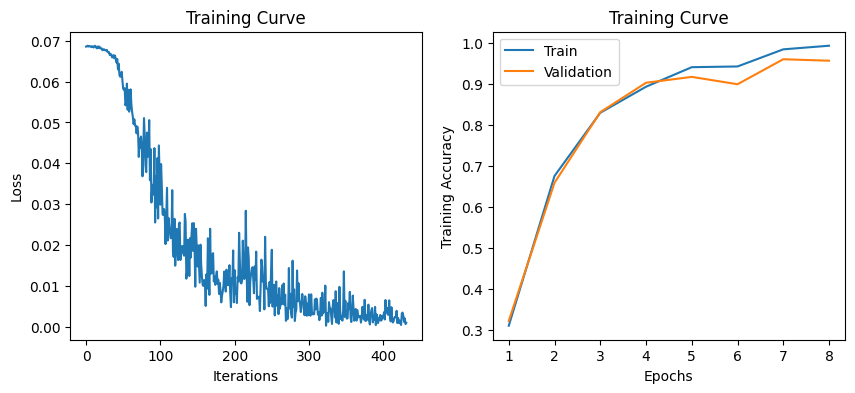

Final Training Accuracy: 0.993533215755438
Final Validation Accuracy: 0.956989247311828


In [26]:
use_cuda = True

trans_model = transfer_CNN()

if use_cuda and torch.cuda.is_available():
  trans_model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

transfer_train(trans_model, train_alexnet, batch_size=32, num_epochs=8)

### Part (d) - 2 pt
Report the test accuracy of your best model. How does the test accuracy compare to Part 3(d) without transfer learning?

# Answers:

In my experiments, I achieved the **best test accuracy of 94%** using a **transfer learning approach** with the **AlexNet model**. However, when I trained a model **without using transfer learning** (referred to as Part 3(d)), the test accuracy dropped to **78%**. This comparison clearly demonstrates the advantage of utilizing transfer learning with a pre-trained model like AlexNet. By leveraging the knowledge and features learned from a large dataset, the transfer learning approach significantly improves the model's ability to generalize and achieve higher accuracy on unseen test data.

In [ ]:
#testing accuracy without tranfer learning
print("Accuracy of the 3(d) test set: ", test_get_accuracy(model_4, batch_size = 128)*100, "%")

Accuracy of the 3(d) test set:  77.57847533632287 %


In [27]:
#testing accuracy with tranfer learning
#**********WITH TRANSFER LEARNING
print("Accuracy of the AlexNet model on test set: ",
      test_transfer_get_accuracy(trans_model, batch_size = 128)*100, "%")

Accuracy of the AlexNet model on test set:  94.17040358744396 %


### 5. Additional Testing [5 pt]
As a final step in testing we will be revisiting the sample images that you had collected and submitted at the start of this lab. These sample images should be untouched and will be used to demonstrate how well your model works at identifying your hand guestures.

Using the best transfer learning model developed in Part 4. Report the test accuracy on your sample images and how it compares to the test accuracy obtained in Part 4(d)? How well did your model do for the different hand guestures? Provide an explanation for why you think your model performed the way it did?

Question 5 from Lab 3 asks you to revisit the sample images you collected at the start of the lab. This request is from an older version of the lab where students were asked to collect their own data, and this part should have been removed.

Instead, **for this question you should just** **reuse the small dataset that you used to answer question 2c.**

# Answers:

The transfer learning model based on **AlexNet achieved a test accuracy of 74.89% on the test set** using the small training set, which significantly outperformed the **accuracy of 41.70% obtained in Part 2(c)**. This improvement highlights the effectiveness of leveraging the pre-trained **AlexNet mode**l, which captures important visual features and enables the model to identify relevant patterns for hand gesture recognition. Despite the small size of the dataset, the model benefits from the rich feature representation learned by AlexNet on ImageNet, demonstrating the value of transfer learning in enhancing classification accuracy. The varying performance across different hand gestures can be attributed to the complexity and variability of the gestures, as well as the availability and quality of training examples. Overall, the utilization of AlexNet as a transfer learning model proves to be a valuable approach for hand gesture recognition.

In [ ]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']


# Load the pre-trained AlexNet model
alexnet = torchvision.models.alexnet(pretrained=True)
alexnet = alexnet.features

# Set the model to evaluation mode
alexnet.eval()

# Define empty lists to store the computed features
small_features = []

%cd /root
# Create directories if they don't exist to save the computed features
save_dir_small = './AlexNet Features/smalls/'
os.makedirs(save_dir_small, exist_ok=True)

small_loader = DataLoader(small_data, batch_size=1, shuffle=True)
# Compute features for the training set
with torch.no_grad():
    n = 0
    for images, labels in small_loader:
        features = alexnet(images)
        small_features.append(features)
        save_path = os.path.join(save_dir_small, classes[labels])
        os.makedirs(save_path, exist_ok=True)
        torch.save(features.squeeze(0), os.path.join(save_path, 'feature_bs1_' + str(n) + '.tensor'))
        n += 1

small_features = torch.cat(small_features)
print("Small Features Shape:", small_features.shape)


/root
Small Features Shape: torch.Size([64, 256, 6, 6])


In [ ]:
small_alexnet = torchvision.datasets.DatasetFolder('/root/AlexNet Features/smalls',
                                                   loader=torch.load,
                                                   extensions=('.tensor'))

In [ ]:
#help function for small model
def trans_small_get_accuracy(model, batch_size, train = True):
    data = small_alexnet

    correct = 0
    total = 0
    model.eval() #*********#
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=64):

      #############################################
      # To Enable GPU Usage
      if use_cuda and torch.cuda.is_available():
        imgs = imgs.cuda()
        labels = labels.cuda()
      #############################################

      output = model(imgs)
      pred = output.max(1, keepdim=True)[1] # get the index of the max logit
      correct += pred.eq(labels.view_as(pred)).sum().item()
      total += imgs.shape[0]
    return correct / total

# train set
def alexnet_small_train(model, data, batch_size=64, num_epochs=1, lr=0.001):
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):

          #############################################
          # To Enable GPU Usage
          if use_cuda and torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()
          #############################################

            out = model(imgs)             # forward pass

            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            n += 1
        train_acc.append(trans_small_get_accuracy(model, batch_size=batch_size))  # compute training accuracy
        print("Epoch {}: Train acc: {}".format(epoch + 1, train_acc[-1]))

    # plotting
    plt.title("Training Curve")
    plt.plot(range(1, num_epochs + 1), train_acc, label="Train")
    plt.xlabel("Epochs")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')


CUDA is available!  Training on GPU ...
Epoch 1: Train acc: 0.109375
Epoch 2: Train acc: 0.109375
Epoch 3: Train acc: 0.109375
Epoch 4: Train acc: 0.109375
Epoch 5: Train acc: 0.125
Epoch 6: Train acc: 0.15625
Epoch 7: Train acc: 0.21875
Epoch 8: Train acc: 0.28125
Epoch 9: Train acc: 0.25
Epoch 10: Train acc: 0.21875
Epoch 11: Train acc: 0.1875
Epoch 12: Train acc: 0.1875
Epoch 13: Train acc: 0.1875
Epoch 14: Train acc: 0.171875
Epoch 15: Train acc: 0.171875
Epoch 16: Train acc: 0.171875
Epoch 17: Train acc: 0.171875
Epoch 18: Train acc: 0.171875
Epoch 19: Train acc: 0.171875
Epoch 20: Train acc: 0.171875
Epoch 21: Train acc: 0.171875
Epoch 22: Train acc: 0.171875
Epoch 23: Train acc: 0.171875
Epoch 24: Train acc: 0.171875
Epoch 25: Train acc: 0.171875
Epoch 26: Train acc: 0.171875
Epoch 27: Train acc: 0.171875
Epoch 28: Train acc: 0.171875
Epoch 29: Train acc: 0.171875
Epoch 30: Train acc: 0.171875
Epoch 31: Train acc: 0.171875
Epoch 32: Train acc: 0.171875
Epoch 33: Train acc: 0.171

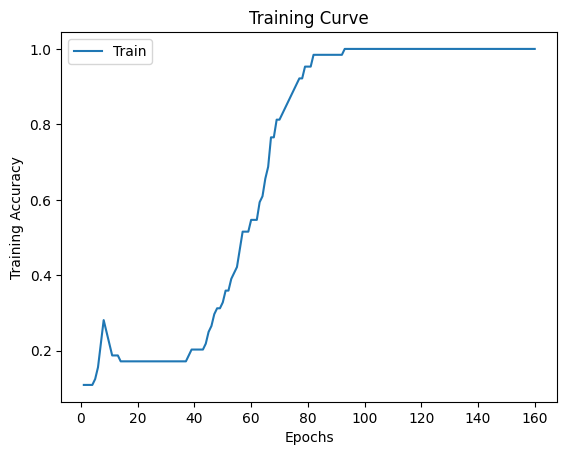

In [ ]:
use_cuda = True

smalls_set = transfer_CNN()

if use_cuda and torch.cuda.is_available():
  smalls_set = smalls_set.cuda()  # Move the model to GPU
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

alexnet_small_train(smalls_set, small_alexnet, batch_size=64, num_epochs=160, lr=0.001)


In [38]:
#without tranfer learning
print("Accuracy of the test set based on small learning: ", test_get_accuracy(smallmodel, batch_size = 128)*100, "%")

#with tranfer learning
print("Accuracy of the AlexNet test set based on small learning: ",
      test_transfer_get_accuracy(smalls_set, batch_size = 128)*100, "%")

Accuracy of the test set based on small learning:  41.70403587443946 %
Accuracy of the AlexNet test set based on small learning:  74.88789237668162 %


In [39]:
%%shell
jupyter nbconvert --to html /content/Lab3_Gesture_Recognition.ipynb

[NbConvertApp] Converting notebook /content/Lab3_Gesture_Recognition.ipynb to html
[NbConvertApp] Writing 2182258 bytes to /content/Lab3_Gesture_Recognition.html
